# Семинар 3. Продвинутые техники работы с данными для построения модели линейной регрессии. Подбор гиперпараметров

Подгрузим данные с соревнования https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
train_path = './data/lab3/train.csv'

In [4]:
train_data = pd.read_csv(train_path)

In [5]:
len(train_data)

1460

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_data.select_dtypes('object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [8]:
train_data.select_dtypes(np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


## Обработка данных

Выкинем индекс

In [9]:
train_data = train_data.drop(columns=['Id'])

In [10]:
cat_over_columns = ['Street', 'Alley', 'LandContour','Utilities','Condition2',
                    'RoofMatl','BsmtCond','Heating','Electrical','Functional','GarageQual','GarageCond','PavedDrive']
train_data = train_data.drop(columns=cat_over_columns)

In [11]:
too_much_na_columns = ['PoolQC', 'Fence', 'MiscFeature']
train_data = train_data.drop(columns=too_much_na_columns)

Заполним пропуски средним

In [12]:
numeric_feats = train_data.select_dtypes(np.number).columns
mean = train_data[numeric_feats].mean()
train_data[numeric_feats] = train_data[numeric_feats].fillna(mean)

In [13]:
numeric_feats = list(numeric_feats)
numeric_feats.remove('SalePrice')

In [14]:
cat_feats = train_data.select_dtypes(object).columns
mode = train_data.mode().iloc[0]
train_data[cat_feats] = train_data[cat_feats].fillna(mode)

In [15]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,Gtl,CollgCr,Norm,1Fam,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,FR2,Gtl,Veenker,Feedr,1Fam,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Inside,Gtl,CollgCr,Norm,1Fam,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Corner,Gtl,Crawfor,Norm,1Fam,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,FR2,Gtl,NoRidge,Norm,1Fam,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Inside,Gtl,Gilbert,Norm,1Fam,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Reg,Inside,Gtl,NWAmes,Norm,1Fam,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Reg,Inside,Gtl,Crawfor,Norm,1Fam,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Reg,Inside,Gtl,NAmes,Norm,1Fam,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [17]:
ct = ColumnTransformer([
    ('ohe', OneHotEncoder(), cat_feats),
    ('scaler', StandardScaler(), numeric_feats)
])

In [18]:
y = train_data['SalePrice']
X = train_data.drop(columns = 'SalePrice')

In [19]:
X_simple = ct.fit_transform(X)

In [20]:
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size = 0.3, random_state=10)

In [21]:
model = LinearRegression()
model.fit(X_train_simple, y_train)
y_pred = model.predict(X_test_simple)

In [22]:
from sklearn.metrics import mean_squared_error as mse
def rmse(y, pred):
    return np.sqrt(mse(y, pred))

In [23]:
rmse(y_test, y_pred)

29019.66857872087

## Магия вне хогвартса

Теперь посмотрим внимательно на распределение таргета:

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

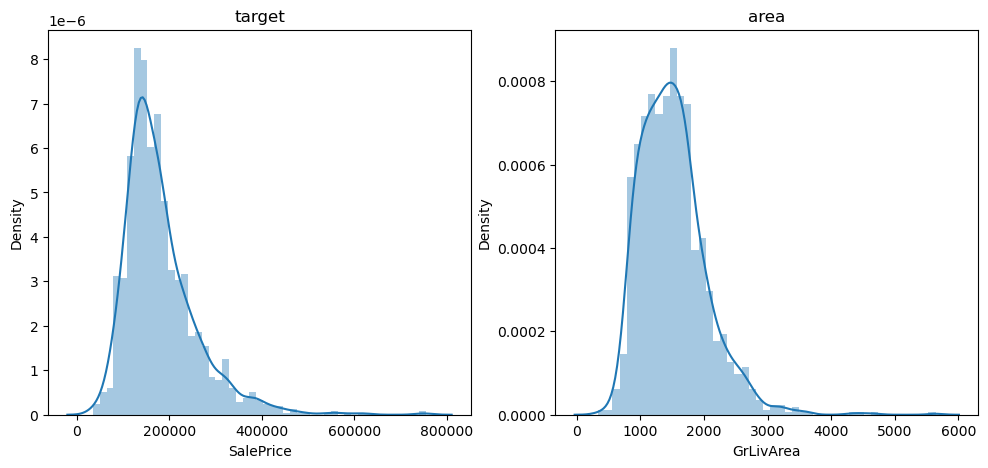

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.distplot(y, label='target')
plt.title('target')

plt.subplot(1, 2, 2)
sns.distplot(train_data.GrLivArea, label='area')
plt.title('area')
plt.show()

***Методом пристального взгляда*** можно заметить, что распределения площади и таргета сильно смещены и не являются нормальными

Давайте прологарифмируем таргет и посмотрим, что получится

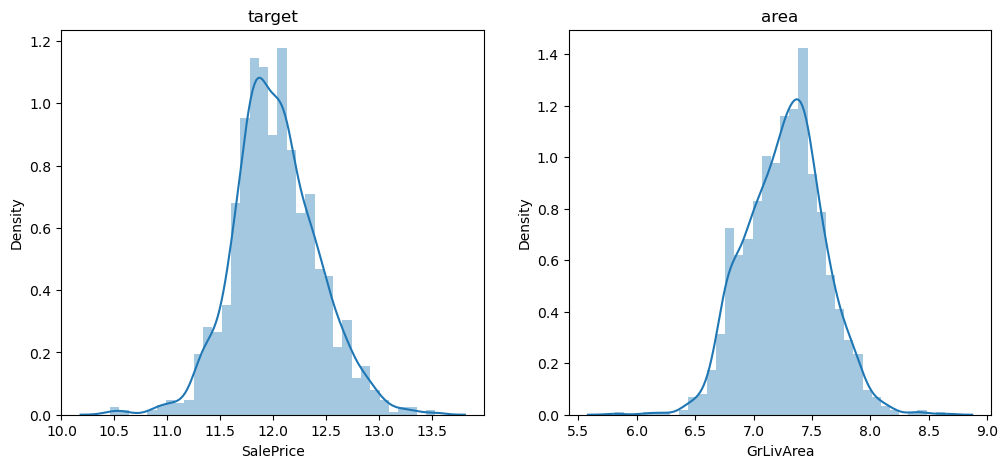

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.distplot(np.log(y+1), label='target')
plt.title('target')

plt.subplot(1, 2, 2)
sns.distplot(np.log(train_data.GrLivArea+1), label='area')
plt.title('area')
plt.show()

После логарифмирования мы получаем ***офигенное нормальное распределение*** для таргета и площади

Давайте теперь обучать модель не на истинное значение таргета, а на логарифм, а также признак GrLivArea прологарифмируем. 

***ВАЖНО***: когда будем считать качество модели, то нужно проэкспоненцировать результаты, чтобы получить значение цены квартиры

In [27]:
X_wo_cat = X[numeric_feats]
X_wo_cat['GrLivArea'] = X_wo_cat['GrLivArea'].apply(np.log1p)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_wo_cat, y, test_size = 0.3, random_state=10)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
upgraded_model = LinearRegression()
upgraded_model.fit(X_train, np.log1p(y_train))
y_pred_log = upgraded_model.predict(X_test)
y_pred = np.exp(y_pred_log) - 1

In [31]:
rmse(y_test, y_pred)

25918.774811709885

Качество улучшилось на целых 6 тысяч, при этом мы вообще не использовали ***категориальные признаки*** и ***регуляризацию***

Давайте вспомним прошлое занятие, на котором разбиралась регуляризация.

Какие виды регуляризации вы знаете и чем они отличаются? ***(1 балл)***

Напишите формулу для L1 и L2 нормы. Какой вид функции потерь будет иметь модель, если к ней применить регуляризацию? ***(1 балл)***

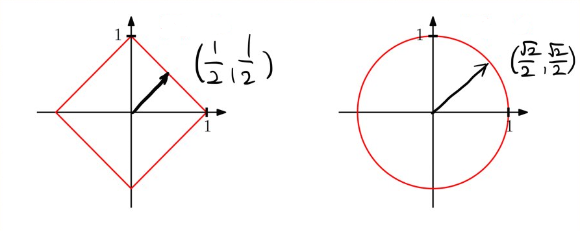

In [32]:
from IPython.display import ImageImage('img.png') 

In [33]:
ridge = Ridge()
ridge.fit(X_train, np.log1p(y_train))
y_pred_log = ridge.predict(X_test)
y_pred = np.exp(y_pred_log) - 1

In [34]:
rmse(y_test, y_pred)

25914.21749573166

Ridge (без подбора ***гиперпараметра***) дал прирост в 4 тысячи относительно самой первой модели 

Теперь давайте поговорим про то, как нужно работать с категориальными переменными. Давайте схитрим и будем менять значение конкретной категории на ***среднее значение таргета внутри категории***. Что это нам даст? Мы перейдём от категориальных переменных к числовым, нам не придётся увеличивать размерность признакового описания модели, и мы сможем использовать категориальные фичи для построения модели. 

***Какие подводные?*** Допустим, что в нашем датасете есть категория, которая встречается 1 раз во всём датасете. Её мы закодируем её же значением ***таргета***. Теперь у модели есть признак, по которому она на трейне всегда идеально может для этого объекта предсказать его таргет. Это ***переобучение***, потому что если эта редкая категория встретится в тесте, то мы не сможем честно посчитать для неё прогноз. Как быть?

Что такое ***кросс-валидация на k-foldах***? В каких случаях она может быть полезна? ***(1 балл)*** 

Давайте теперь будем использовать кросс-валидацию. А какие подвоные могут быть, если мы будем её использовать? (***Если кто-то догадается, то это сразу +3 балла и личная рекомендация Илье от меня***)

***Leave-one-out CV*** (LOO-CV) - это кросс-валидация на n-1 фолдах, где n - это размер выборки. Какой буст это нам даст? В обычной кросс-валидации у нас могли быть фолды, в которых слишком мало объектов опеределённой категории, поэтому мы опять могли переобучиться. Теперь же мы значение на i-ом объекте для какой-то категории используем среднее по таргету ***ВСЕХ*** объектов этой категории, кроме i-го.

In [35]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [36]:
from category_encoders import LeaveOneOutEncoder

In [37]:
encoder = LeaveOneOutEncoder()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [39]:
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test, y_test)

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
ridge = Ridge()
ridge.fit(X_train, np.log1p(y_train))
y_pred_log = ridge.predict(X_test)
y_pred = np.exp(y_pred_log) - 1

In [42]:
rmse(y_test, y_pred)

23962.5516292088

Сильного выигрыша это не дало, но значение функции потерь стало чуть меньше. Теперь попробуем подобрать единственный ***гиперпараметр*** - коэффициент регуляризации

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
model = Ridge()
alphas = np.linspace(0.1, 5, 1000)
param_grid = {'alpha': alphas}

In [45]:
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_root_mean_squared_error', 
                           n_jobs=-1)
grid_search.fit(X_train, np.log1p(y_train))

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.1       , 0.1049049 , 0.10980981, 0.11471471, 0.11961962,
       0.12452452, 0.12942943, 0.13433433, 0.13923924, 0.14414414,
       0.14904905, 0.15395395, 0.15885886, 0.16376376, 0.16866867,
       0.17357357, 0.17847848, 0.18338338, 0.18828829, 0.19319319,
       0.1980981 , 0.203003  , 0.20790791, 0.21281281, 0.21771772,
       0.22262262, 0....
       4.85775776, 4.86266266, 4.86756757, 4.87247247, 4.87737738,
       4.88228228, 4.88718719, 4.89209209, 4.896997  , 4.9019019 ,
       4.90680681, 4.91171171, 4.91661662, 4.92152152, 4.92642643,
       4.93133133, 4.93623624, 4.94114114, 4.94604605, 4.95095095,
       4.95585586, 4.96076076, 4.96566567, 4.97057057, 4.97547548,
       4.98038038, 4.98528529, 4.99019019, 4.9950951 , 5.        ])},
             scoring='neg_root_mean_squared_error')

In [46]:
params = grid_search.best_params_
params

{'alpha': 5.0}

In [47]:
best_score = grid_search.best_score_
best_score

-0.15702266321700137

In [48]:
ridge = Ridge(**params)

In [49]:
ridge.fit(X_train, np.log1p(y_train))

Ridge(alpha=5.0)

In [50]:
y_pred = ridge.predict(X_test)

In [51]:
rmse(y_test, np.exp(y_pred)-1)

23931.957374817106